In [47]:
import pickle
import os, sys
import pandas as pd

In [ ]:
# 참고 링크들 : https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/

In [8]:
pd_dataset = pd.read_csv('/opt/ml/dataset/train/train.csv')

In [9]:
pd_dataset.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [15]:
pd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [16]:
pd_dataset.nunique()

id                32470
sentence          28803
subject_entity    26340
object_entity     25704
label                30
source                3
dtype: int64

In [127]:
pd_dataset.subject_entity[0]

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

### sub, obj 갯수

In [133]:
sub_org = defaultdict(int)
for idx, subjects in pd_dataset.subject_entity.iteritems():
    sub_org[eval(subjects)['type']] +=1 
print(sub_org)

defaultdict(<class 'int'>, {'ORG': 15684, 'PER': 16786})


In [134]:
obj_org = defaultdict(int)
for idx, objects in pd_dataset.object_entity.iteritems():
    obj_org[eval(objects)['type']] +=1 
print(obj_org)

defaultdict(<class 'int'>, {'PER': 9788, 'ORG': 9346, 'DAT': 4249, 'LOC': 3561, 'POH': 5113, 'NOH': 413})


In [164]:
obj_org.keys()

dict_keys(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'])

In [91]:
pd_dataset[pd_dataset.duplicated(['sentence'])]

,id,sentence,subject_entity,object_entity,label,source
229,229,자의왕후는 문무왕과의 사이에서 소명태자와 훗날 신문왕이 되는 정명태자를 낳았다.,"{'word': '신문왕', 'start_idx': 26, 'end_idx': 28...","{'word': '문무왕', 'start_idx': 6, 'end_idx': 8, ...",per:parents,wikipedia
612,612,"이후 새천년민주당은 다른 세력들과 이합집산을 거듭한 끝에 더불어민주당이 되고, 통합...","{'word': '민주당', 'start_idx': 35, 'end_idx': 37...","{'word': '민중당', 'start_idx': 81, 'end_idx': 83...",no_relation,wikipedia
830,830,2016년 10월 30일 FC 안양과의 최종전서 승리를 거두며 2016년 K리그 챌...,"{'word': '안산 무궁화 축구단', 'start_idx': 60, 'end_i...","{'word': '2016년', 'start_idx': 35, 'end_idx': ...",no_relation,wikipedia
948,948,푸블리우스 아일리우스 트라야누스 하드리아누스(76년 1월 24일~138년 7월 10...,"{'word': '트라야누스', 'start_idx': 12, 'end_idx': ...","{'word': '로마 제국', 'start_idx': 50, 'end_idx': ...",per:origin,wikipedia
998,998,일본 총독이 수작(受爵) 승인서를 내밀고 도장 찍기를 강요하니까 그 아들 이직각(李...,"{'word': '이기원', 'start_idx': 58, 'end_idx': 60...","{'word': '이봉의', 'start_idx': 50, 'end_idx': 52...",per:parents,wikipedia
...,...,...,...,...,...,...
32451,32451,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...",per:parents,wikipedia
32454,32454,신라에서는 중기까지도 지배계층의 가계계승에 있어서 모계적인 경향이 그대로 존속되었고...,"{'word': '선덕여왕', 'start_idx': 101, 'end_idx': ...","{'word': '진덕여왕', 'start_idx': 95, 'end_idx': 9...",no_relation,wikipedia
32463,32463,"그의 외삼촌은 루이 13세로, 남편인 루이 14세는 외사촌 오빠가 된다.","{'word': '루이 14세', 'start_idx': 21, 'end_idx':...","{'word': '루이 13세', 'start_idx': 8, 'end_idx': ...",per:other_family,wikipedia
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree


In [12]:
pd_dataset.iloc[0]['sentence']

'〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.'

In [35]:
idx = pd_dataset.duplicated(['sentence'], keep=False)
idx

0        False
1        False
2        False
3        False
4        False
         ...  
32465     True
32466     True
32467    False
32468    False
32469    False
Length: 32470, dtype: bool

In [90]:
# df2 = pd_dataset[pd_dataset.duplicated(['sentence'])==True].sort_values('sentence')
# print(df2)
df2 = pd_dataset[pd_dataset.sentence.duplicated(keep=False)].sort_values("sentence")
# training, eval 만들 때 sentence 기준으로 하고, class 별로 stratified. 
print(len(pd_dataset))
print(len(df2))
df2[:20]

32470
7090


,id,sentence,subject_entity,object_entity,label,source
919,919,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '노무현', 'start_idx': 127, 'end_idx': 1...",no_relation,wikipedia
14736,14736,"""2006년 지방선거에 참패하고 민주당과 그 전신인 열린 우리당은 노 씨의 국정 운...","{'word': '열린 우리당', 'start_idx': 29, 'end_idx':...","{'word': '정세균', 'start_idx': 108, 'end_idx': 1...",no_relation,wikipedia
28051,28051,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...",no_relation,wikitree
3588,3588,"""소이현, 인교진이 하는 광고는 괜찮고"", ""차 광고할 때 여자가 남자한테 하던 소...","{'word': '인교진', 'start_idx': 6, 'end_idx': 8, ...","{'word': '소이현', 'start_idx': 52, 'end_idx': 54...",no_relation,wikitree
32434,32434,"""탕약망""이란 예수회 선교사 천문학자 아담 샬의 중국 이름이다.","{'word': '아담 샬', 'start_idx': 21, 'end_idx': 2...","{'word': '예수회', 'start_idx': 8, 'end_idx': 10,...",per:employee_of,wikipedia
19427,19427,"""탕약망""이란 예수회 선교사 천문학자 아담 샬의 중국 이름이다.","{'word': '탕약망', 'start_idx': 1, 'end_idx': 3, ...","{'word': '예수회', 'start_idx': 8, 'end_idx': 10,...",per:employee_of,wikipedia
11401,11401,"'2019 코리아 스타트업 테크쇼'는 경상남도, 창원시, 경남지방중소벤처기업청이 공...","{'word': '경상남도', 'start_idx': 21, 'end_idx': 2...","{'word': '창원시', 'start_idx': 27, 'end_idx': 29...",org:members,wikitree
29166,29166,"'2019 코리아 스타트업 테크쇼'는 경상남도, 창원시, 경남지방중소벤처기업청이 공...","{'word': '창원시', 'start_idx': 27, 'end_idx': 29...","{'word': '경상남도', 'start_idx': 21, 'end_idx': 2...",org:place_of_headquarters,wikitree
23316,23316,"'Project Fairy(프로젝트 페어리)'라는 유닛명으로 가나하 히비키, 시죠 ...","{'word': '가나하 히비키', 'start_idx': 34, 'end_idx'...","{'word': '프로젝트 페어리', 'start_idx': 15, 'end_idx...",per:employee_of,wikipedia
16566,16566,"'Project Fairy(프로젝트 페어리)'라는 유닛명으로 가나하 히비키, 시죠 ...","{'word': '시죠 타카네', 'start_idx': 43, 'end_idx':...","{'word': '프로젝트 페어리', 'start_idx': 15, 'end_idx...",per:employee_of,wikipedia


In [96]:
from collections import defaultdict
sents = defaultdict(list)
for itr_idx, vals in enumerate(pd_dataset.iterrows()):
    sent = vals[1]['sentence']
    sent_idx = vals[0]
    sents[sent].append(sent_idx)    
assert len(pd_dataset) == sum([len(s) for s in sents.values()])

In [101]:
print(len(sents.keys()))
dup_idx = defaultdict(int)
for k, v in sents.items():
    dup_idx[len(v)] += 1

28803


<AxesSubplot:xlabel='count', ylabel='label'>

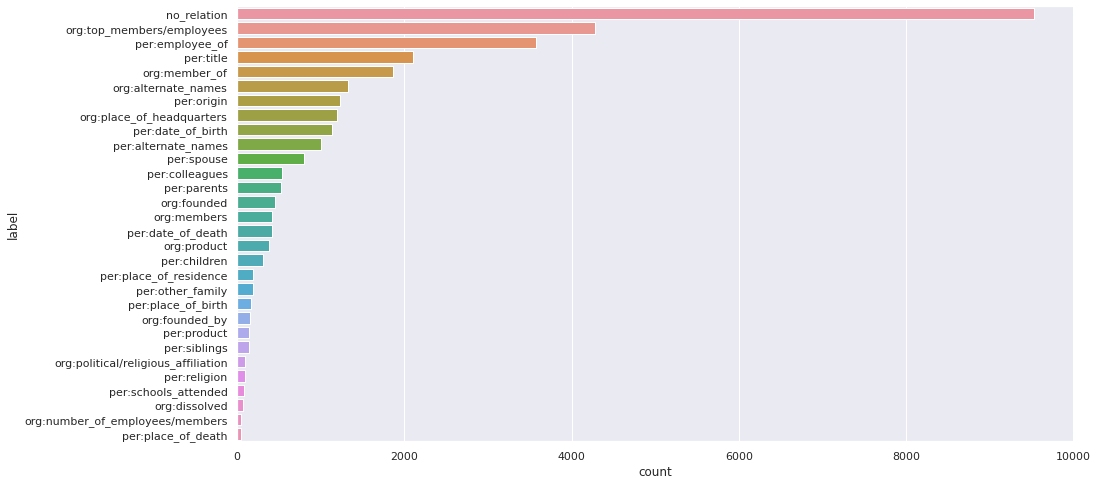

In [109]:
import seaborn as sns
import numpy as np
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='label', data=pd_dataset, order=pd_dataset['label'].value_counts().index)

In [259]:
label_info

{'no_relation': 9534,
 'org:top_members/employees': 4284,
 'per:employee_of': 3573,
 'per:title': 2103,
 'org:member_of': 1866,
 'org:alternate_names': 1320,
 'per:origin': 1234,
 'org:place_of_headquarters': 1195,
 'per:date_of_birth': 1130,
 'per:alternate_names': 1001,
 'per:spouse': 795,
 'per:colleagues': 534,
 'per:parents': 520,
 'org:founded': 450,
 'org:members': 420,
 'per:date_of_death': 418,
 'org:product': 380,
 'per:children': 304,
 'per:place_of_residence': 193,
 'per:other_family': 190,
 'per:place_of_birth': 166,
 'org:founded_by': 155,
 'per:product': 139,
 'per:siblings': 136,
 'org:political/religious_affiliation': 98,
 'per:religion': 96,
 'per:schools_attended': 82,
 'org:dissolved': 66,
 'org:number_of_employees/members': 48,
 'per:place_of_death': 40}

### 총 데이터셋 description

In [105]:
# 총 데이터셋
print(len(pd_dataset))
# unique sentence
print(len(sents.keys()))
# 각 sentence 중복 분ㅍ
print(dup_idx)

32470
28803
defaultdict(<class 'int'>, {1: 25380, 2: 3179, 3: 244})


### entity에 따른 단어 분포는 어떨까 (subj, obj 각각의 분포) 

In [136]:
word_subj_org = defaultdict(int)
for idx, subjects in pd_dataset.subject_entity.iteritems():
    word_subj_org[eval(subjects)['word']] +=1 
print(len(word_subj_org))

12052


In [143]:
sorted(word_subj_org.items(), key = lambda x: -x[1])[:20]

[('민주당', 144),
 ('화순군', 107),
 ('고흥군', 99),
 ('더불어민주당', 92),
 ('광주광역시', 92),
 ('여수시', 82),
 ('문재인', 80),
 ('목포시', 80),
 ('영암군', 75),
 ('포천시', 73),
 ('FC 서울', 71),
 ('기획재정부', 70),
 ('영광군', 69),
 ('노무현', 68),
 ('두산 베어스', 68),
 ('해남군', 66),
 ('곡성군', 62),
 ('공무원연금공단', 61),
 ('경남대학교', 58),
 ('박정희', 53)]

In [144]:
word_obj_org = defaultdict(int)
for idx, objects in pd_dataset.object_entity.iteritems():
    word_obj_org[eval(objects)['word']] +=1 
print(len(word_obj_org))

10226


In [145]:
sorted(word_obj_org.items(), key = lambda x: -x[1])[:20]

[('대한민국', 276),
 ('자유한국당', 268),
 ('더불어민주당', 236),
 ('문재인', 135),
 ('UEFA', 117),
 ('캐나다', 115),
 ('스페인', 113),
 ('김대중', 113),
 ('정의당', 111),
 ('골키퍼', 110),
 ('경기도', 108),
 ('국민의당', 108),
 ('프랑스', 107),
 ('네덜란드', 106),
 ('구충곤', 102),
 ('이승만', 100),
 ('송귀근', 96),
 ('이탈리아', 96),
 ('이용섭', 88),
 ('잉글랜드', 85)]

###  단어의 출현 빈도는 어떨까? (단어에 따른 subj, obj 각각의 분포)

In [146]:
def return_dict():
    return {'subj':0, 'obj':0}

word_entity = defaultdict(return_dict)
for idx, subjects in pd_dataset.subject_entity.iteritems():
    word_entity[eval(subjects)['word']]['subj'] +=1 

for idx, subjects in pd_dataset.object_entity.iteritems():
    word_entity[eval(subjects)['word']]['obj'] +=1 


In [219]:
sort_by_obj = sorted(word_entity.items(), key= lambda x: -x[1]['obj'])
# print(sort_by_obj[:5])
print('sort by obj')
obj_topten = []
for idx, (k, v) in enumerate(sort_by_obj):
    print(k,v)
    obj_topten.append(k)
    if idx ==10:
        break
print()
print('sort by subj')
subj_topten = []
sort_by_subj = sorted(word_entity.items(), key= lambda x: -x[1]['subj'])
# print(sort_by_subj[:5])
for idx, (k, v) in enumerate(sort_by_subj):
    print(k,v)
    subj_topten.append(k)
    if idx ==10:
        break

sort by obj
대한민국 {'subj': 1, 'obj': 276}
자유한국당 {'subj': 13, 'obj': 268}
더불어민주당 {'subj': 92, 'obj': 236}
문재인 {'subj': 80, 'obj': 135}
UEFA {'subj': 10, 'obj': 117}
캐나다 {'subj': 12, 'obj': 115}
김대중 {'subj': 52, 'obj': 113}
스페인 {'subj': 15, 'obj': 113}
정의당 {'subj': 41, 'obj': 111}
골키퍼 {'subj': 0, 'obj': 110}
국민의당 {'subj': 38, 'obj': 108}

sort by subj
민주당 {'subj': 144, 'obj': 74}
화순군 {'subj': 107, 'obj': 7}
고흥군 {'subj': 99, 'obj': 0}
더불어민주당 {'subj': 92, 'obj': 236}
광주광역시 {'subj': 92, 'obj': 19}
여수시 {'subj': 82, 'obj': 11}
문재인 {'subj': 80, 'obj': 135}
목포시 {'subj': 80, 'obj': 1}
영암군 {'subj': 75, 'obj': 0}
포천시 {'subj': 73, 'obj': 6}
FC 서울 {'subj': 71, 'obj': 15}


In [254]:
sort_by_obj = sorted(word_entity.items(), key= lambda x: x[1]['obj'])
# print(sort_by_obj[:5])
print('sort by obj reversed')
obj_lowten = []
for idx, (k, v) in enumerate(sort_by_obj):
    print(k,v)
    obj_lowten.append(k)
    if idx ==10:
        break
print()
print('sort by subj reversed')
subj_lowten = []
sort_by_subj = sorted(word_entity.items(), key= lambda x: x[1]['subj'])
# print(sort_by_subj[:5])
for idx, (k, v) in enumerate(sort_by_subj):
    print(k,v)
    subj_lowten.append(k)
    if idx ==10:
        break

sort by obj reversed
광주FC {'subj': 5, 'obj': 0}
아성다이소 {'subj': 2, 'obj': 0}
북대서양 조약 기구 {'subj': 7, 'obj': 0}
박용오 {'subj': 2, 'obj': 0}
안규백 {'subj': 3, 'obj': 0}
하비에르 파스토레 {'subj': 3, 'obj': 0}
빌리 아일리시 {'subj': 2, 'obj': 0}
미켈란젤로 {'subj': 4, 'obj': 0}
제2총군 {'subj': 2, 'obj': 0}
문성민 {'subj': 6, 'obj': 0}
스티브 바라캇 {'subj': 2, 'obj': 0}

sort by subj reversed
조지 해리슨 {'subj': 0, 'obj': 1}
박정부 {'subj': 0, 'obj': 3}
1967 {'subj': 0, 'obj': 2}
NATO {'subj': 0, 'obj': 7}
1989 {'subj': 0, 'obj': 6}
1937년 4월 29일 {'subj': 0, 'obj': 1}
싱어송라이터 {'subj': 0, 'obj': 35}
오클랜드 {'subj': 0, 'obj': 8}
르네상스 {'subj': 0, 'obj': 5}
경기대 {'subj': 0, 'obj': 5}
환경부 {'subj': 0, 'obj': 26}


### 동일한 word, entity지만 다른 Relation을 가진 케이스는 얼마나 있을까?
### 그때의 Relation과 subject, entity는 major class인가 minor class인가?

In [213]:
import copy
labels = {k:0 for k in dict(pd_dataset['label'].value_counts()).keys()}
def return_dict():
    return {'subj':
                copy.deepcopy(labels)
                
            , 'obj':
                copy.deepcopy(labels)
                
           , 'total':
                copy.deepcopy(labels)
                }
word_entity_total = defaultdict(return_dict)
for idx, row_val in pd_dataset.iterrows():
    subj = row_val['subject_entity']
    obj = row_val['object_entity']
    label = row_val['label']
    
    s_vals = eval(subj)
    o_vals = eval(obj)
    # print(subj, obj, label, s_vals, o_vals)
    
    word_entity_total[s_vals['word']]['subj'][label] +=1 
    word_entity_total[o_vals['word']]['obj'][label] +=1
    
    word_entity_total[s_vals['word']]['total'][label] +=1 
    word_entity_total[o_vals['word']]['total'][label] +=1 

In [222]:
topten = obj_topten + subj_topten

In [252]:
label_info = dict(pd_dataset['label'].value_counts())

def catch_top(ent):
    subj_max = 0
    subj_sum = 0
    subj_rel = ''
    
    obj_max = 0
    obj_sum = 0
    obj_rel = ''
    
    total = 0
    total_list = []
    for idx,(subjs, objs, totals) in enumerate(zip(ent['subj'].items(), ent['obj'].items(), ent['total'].items())):
        subj_sum += subjs[1]
        if subj_max < subjs[1]:
            subj_max = subjs[1]
            sub_rel = subjs[0]
            
        obj_sum += objs[1]   
        if obj_max < objs[1]:
            obj_max = objs[1]
            obj_rel = objs[0]
         
        
        total += totals[1]
        total_list.append((totals[0], totals[1]))
                          
    total_list.sort(key=lambda x:-x[1])
    print(f'###################################')
    print(f'> in total :: {total} times appeared!')
    print(f'> most appeared label is {total_list[0][0]}! this label appears {label_info[total_list[0][0]]} in dataset')
    print(f'> in total top 5 appeared relationship is')
    for rel, cnt in total_list[:5]:
        print(f'   * {rel} - {cnt}')
    try:
        print(f'> as subj  ::  {sub_rel} appeared {subj_max}/{subj_sum} ')
    except:
        print(f'> not appared as subj : {subj_sum} ')
    
    try:
        print(f'> as obj   ::  {obj_rel} appeared {obj_max}/{obj_sum} ')
    except:
        print(f'> not appared as obj : {obj_sum} ')
    print(f'###################################')
    
word = '대한민국'
print(word)
catch_top(word_entity_total[word])

대한민국
###################################
> in total :: 277 times appeared!
> most appeared label is per:origin! this label appears 1234 in dataset
> in total top 5 appeared relationship is
   * per:origin - 126
   * org:place_of_headquarters - 72
   * per:place_of_residence - 35
   * no_relation - 28
   * per:place_of_birth - 6
> as subj  ::  org:top_members/employees appeared 1/1 
> as obj   ::  per:origin appeared 126/276 
###################################


In [256]:
for w in subj_topten:
    print(f'@ info @ {w}')
    catch_top(word_entity_total[w])
    print()

@ info @ 민주당
###################################
> in total :: 218 times appeared!
> most appeared label is no_relation! this label appears 9534 in dataset
> in total top 5 appeared relationship is
   * no_relation - 130
   * per:employee_of - 42
   * org:top_members/employees - 28
   * org:alternate_names - 9
   * org:founded_by - 3
> as subj  ::  no_relation appeared 102/144 
> as obj   ::  per:employee_of appeared 42/74 
###################################

@ info @ 화순군
###################################
> in total :: 114 times appeared!
> most appeared label is org:top_members/employees! this label appears 4284 in dataset
> in total top 5 appeared relationship is
   * org:top_members/employees - 101
   * org:member_of - 8
   * org:place_of_headquarters - 3
   * no_relation - 2
   * per:employee_of - 0
> as subj  ::  org:top_members/employees appeared 101/107 
> as obj   ::  org:member_of appeared 5/7 
###################################

@ info @ 고흥군
##############################

In [253]:
for w in obj_topten:
    print(f'@ info @ {w}')
    catch_top(word_entity_total[w])
    print()

@ info @ 대한민국
###################################
> in total :: 277 times appeared!
> most appeared label is per:origin! this label appears 1234 in dataset
> in total top 5 appeared relationship is
   * per:origin - 126
   * org:place_of_headquarters - 72
   * per:place_of_residence - 35
   * no_relation - 28
   * per:place_of_birth - 6
> as subj  ::  org:top_members/employees appeared 1/1 
> as obj   ::  per:origin appeared 126/276 
###################################

@ info @ 자유한국당
###################################
> in total :: 281 times appeared!
> most appeared label is per:employee_of! this label appears 3573 in dataset
> in total top 5 appeared relationship is
   * per:employee_of - 244
   * no_relation - 24
   * org:top_members/employees - 12
   * org:alternate_names - 1
   * per:title - 0
> as subj  ::  org:top_members/employees appeared 12/13 
> as obj   ::  per:employee_of appeared 244/268 
###################################

@ info @ 더불어민주당
#############################

In [257]:
for w in obj_lowten:
    print(f'@ info @ {w}')
    catch_top(word_entity_total[w])
    print()

@ info @ 광주FC
###################################
> in total :: 5 times appeared!
> most appeared label is org:place_of_headquarters! this label appears 1195 in dataset
> in total top 5 appeared relationship is
   * org:place_of_headquarters - 4
   * org:member_of - 1
   * no_relation - 0
   * org:top_members/employees - 0
   * per:employee_of - 0
> as subj  ::  org:place_of_headquarters appeared 4/5 
> as obj   ::   appeared 0/0 
###################################

@ info @ 아성다이소
###################################
> in total :: 2 times appeared!
> most appeared label is org:top_members/employees! this label appears 4284 in dataset
> in total top 5 appeared relationship is
   * org:top_members/employees - 2
   * no_relation - 0
   * per:employee_of - 0
   * per:title - 0
   * org:member_of - 0
> as subj  ::  org:top_members/employees appeared 2/2 
> as obj   ::   appeared 0/0 
###################################

@ info @ 북대서양 조약 기구
###################################
> in total :: 7

In [258]:
for w in subj_lowten:
    print(f'@ info @ {w}')
    catch_top(word_entity_total[w])
    print()

@ info @ 조지 해리슨
###################################
> in total :: 1 times appeared!
> most appeared label is no_relation! this label appears 9534 in dataset
> in total top 5 appeared relationship is
   * no_relation - 1
   * org:top_members/employees - 0
   * per:employee_of - 0
   * per:title - 0
   * org:member_of - 0
> not appared as subj : 0 
> as obj   ::  no_relation appeared 1/1 
###################################

@ info @ 박정부
###################################
> in total :: 3 times appeared!
> most appeared label is org:top_members/employees! this label appears 4284 in dataset
> in total top 5 appeared relationship is
   * org:top_members/employees - 3
   * no_relation - 0
   * per:employee_of - 0
   * per:title - 0
   * org:member_of - 0
> not appared as subj : 0 
> as obj   ::  org:top_members/employees appeared 3/3 
###################################

@ info @ 1967
###################################
> in total :: 2 times appeared!
> most appeared label is no_relation! t

In [163]:
# 동일한 subject, entity지만 다른 Relation을 가진 케이스는 얼마나 있을까?
# 그때의 Relation과 subject, entity는 major class인가 minor class인가?

# 엉뚱한 문자가 있을까



In [46]:
df2 = pd_dataset[pd_dataset.subject_entity.duplicated(keep=False)].sort_values("subject_entity")
print(df2)
# 비슷한 아티클 끼리는 subject, object 유사할 것

          id                                           sentence  \
186      186  11번가 주식회사(사장 이상호)가 161개 중소 협력사·납품업체를 위해 50억원 규...   
3336    3336  11번가 이상호 사장은 “다수의 확진자가 발생한 대구, 경북 지역의 빠른 극복을 응...   
13012  13012  11번가(사장 이상호)가 오는 2월 9일까지 홈루덴스족을 위한 다양한 홈카페, 홈시...   
11252  11252  11번가를 통해 SK텔레콤 상품을 구매하면 카드할인 및 무이자할부 외에도 애플 정품...   
12288  12288  11번가 이상호 사장은 “올해 고객 서비스 개선을 위한 다양한 프로세스를 도입해 운...   
...      ...                                                ...   
16488  16488  히틀러는 그동안 피해를 입지 않은 4개 정예사단(제3SS기갑사단 토텐코프, 제5SS...   
27586  27586  히틀러는 더욱 더 혼란에 빠져 헤르만 괴링이 제작시킨 FG-42의 개발과 육군의 G...   
21867  21867  히틀러는 비상 사태를 선언할 기회를 잡았고, 파울 폰 힌덴부르크 대통령에게 바이마르...   
6921    6921  히틀러는 프란츠 폰 파펜을 오스트리아 대사로 임명하면서 사태 수습에 나섰지만 국제 ...   
9528    9528  히틀러는 에바 브라운과 마르틴 보어만이 담배를 피우는 것에 불만을 가졌으며 헤르만 ...   

                                          subject_entity  \
186    {'word': '11번가', 'start_idx': 0, 'end_idx': 3,...   
3336   {'word': '11번가', 'start_idx': 0, 'end_idx': 3,...   
13012  {'word':

In [ ]:
# 클래스 분포
# 학습 문장 최대 길이
# 학습 문장의 평균 길이 -> max_length 확인
# 이상한 문자

In [70]:
df2.head()

,id,sentence,subject_entity,object_entity,label,source
186,186,11번가 주식회사(사장 이상호)가 161개 중소 협력사·납품업체를 위해 50억원 규...,"{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 13, 'end_idx': 15...",org:top_members/employees,wikitree
3336,3336,"11번가 이상호 사장은 “다수의 확진자가 발생한 대구, 경북 지역의 빠른 극복을 응...","{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
13012,13012,"11번가(사장 이상호)가 오는 2월 9일까지 홈루덴스족을 위한 다양한 홈카페, 홈시...","{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 8, 'end_idx': 10,...",org:top_members/employees,wikitree
11252,11252,11번가를 통해 SK텔레콤 상품을 구매하면 카드할인 및 무이자할부 외에도 애플 정품...,"{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': 'SK텔레콤', 'start_idx': 9, 'end_idx': 1...",no_relation,wikitree
12288,12288,11번가 이상호 사장은 “올해 고객 서비스 개선을 위한 다양한 프로세스를 도입해 운...,"{'word': '11번가', 'start_idx': 0, 'end_idx': 3,...","{'word': '이상호', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree


In [49]:
with open('./dict_label_to_num.pkl','rb') as f:
    dict_label_to_num = pickle.load(f)

In [50]:
dict_label_to_num

{'no_relation': 0,
 'org:top_members/employees': 1,
 'org:members': 2,
 'org:product': 3,
 'per:title': 4,
 'org:alternate_names': 5,
 'per:employee_of': 6,
 'org:place_of_headquarters': 7,
 'per:product': 8,
 'org:number_of_employees/members': 9,
 'per:children': 10,
 'per:place_of_residence': 11,
 'per:alternate_names': 12,
 'per:other_family': 13,
 'per:colleagues': 14,
 'per:origin': 15,
 'per:siblings': 16,
 'per:spouse': 17,
 'org:founded': 18,
 'org:political/religious_affiliation': 19,
 'org:member_of': 20,
 'per:parents': 21,
 'org:dissolved': 22,
 'per:schools_attended': 23,
 'per:date_of_death': 24,
 'per:date_of_birth': 25,
 'per:place_of_birth': 26,
 'per:place_of_death': 27,
 'org:founded_by': 28,
 'per:religion': 29}

In [52]:
subject_entity = []
object_entity = []
for i,j in zip(pd_dataset['subject_entity'], pd_dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
out_dataset = pd.DataFrame({'id':pd_dataset['id'], 'sentence':pd_dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':pd_dataset['label'],})

In [53]:
out_dataset

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,'비틀즈','조지 해리슨',no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,'민주평화당','대안신당',no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,'광주FC','한국프로축구연맹',org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,'아성다이소','박정부',org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,'요미우리 자이언츠','1967',no_relation
...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,'유기준','부산 서구·동구',per:employee_of
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",'최시형','손병희',per:colleagues
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,'완도군','신우철',org:top_members/employees
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",'JTBC','중앙홀딩스',no_relation


In [69]:
pd_dataset['subject_entity'][0][1:-1].split(',')[0].split(':')[1]

" '비틀즈'"